#Cybersecurity DNN: Network Intrusion Detection

This data comes from: https://www.kaggle.com/datasets/hassan06/nslkdd

I have decided to do my master's program in cybersecurity and database engineering. I wanted to get my feet wet in using analytics to help detect abnormalities. When I went to a forum, Joe McManus discussed the importance of analytics in cyber and I hope to be able to bring my analytical skills and cyber skills together. This dataset goes through detecting abnormalities in networks.

##Preprocessing

1.Explore the Dataset: Begin by exploring the dataset to understand its structure, the types of features it includes, and the format of the data.

In [199]:
import tensorflow
tensorflow.__version__

'2.14.0'

In [200]:
import pandas as pd
import numpy as np

In [201]:
train = pd.read_csv("/content/KDDTrain.csv")
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [202]:
test = pd.read_csv("/content/KDDTest-21.csv")
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,anomaly
1,0,udp,private,SF,44,0,0,0,0,0,...,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,anomaly
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,anomaly
3,0,udp,private,SF,53,55,0,0,0,0,...,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal
4,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,anomaly


In [203]:
test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [204]:
for col in train.select_dtypes('object').columns:
    train[col] = train[col].astype('category')

In [205]:
for col in test.select_dtypes('object').columns:
    test[col] = test[col].astype('category')

In [206]:
test.dtypes

duration                          int64
protocol_type                  category
service                        category
flag                           category
src_bytes                         int64
dst_bytes                         int64
land                              int64
wrong_fragment                    int64
urgent                            int64
hot                               int64
num_failed_logins                 int64
logged_in                         int64
num_compromised                   int64
root_shell                        int64
su_attempted                      int64
num_root                          int64
num_file_creations                int64
num_shells                        int64
num_access_files                  int64
num_outbound_cmds                 int64
is_host_login                     int64
is_guest_login                    int64
count                             int64
srv_count                         int64
serror_rate                     float64


2.Data Cleaning: Check for any missing or inconsistent data in the dataset. This could involve filling in missing values or correcting anomalies.

In [207]:
train.isna().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
 rerror_rate                   False
s

In [208]:
test.isna().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
 rerror_rate                   False
s

3.Encoding Categorical Data: If the dataset contains categorical data, you'll need to encode these into a numerical format. Methods like one-hot encoding or label encoding are typically used.

In [209]:
from sklearn.preprocessing import LabelEncoder

In [210]:
le = LabelEncoder()

In [211]:
categorical_columns= ["protocol_type","service", "flag","class"]

In [212]:
for col in categorical_columns:  # Replace 'categorical_columns' with your list of categorical column names
    train[col] = le.fit_transform(train[col])

4.Splitting the Data: Divide your dataset into training, validation, and testing sets. A common split ratio is 70% for training, 15% for validation, and 15% for testing

In [213]:
x = train.drop('class', axis=1)
y = train['class']

In [214]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [215]:
x.shape

(25192, 41)

In [216]:
class_counts = y.value_counts()
print(class_counts)

1    13449
0    11743
Name: class, dtype: int64


In [217]:
from sklearn.model_selection import train_test_split

In [218]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [219]:
x_train.shape

(20153, 41)

In [220]:
x_val.shape

(5039, 41)

4.Normalization: Scale the features so that they contribute equally to the model's training process. Techniques like min-max scaling or standardization are commonly used.

In [221]:
from sklearn.preprocessing import StandardScaler

In [222]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data with the same scaler
x_val_scaled = scaler.transform(x_val)

In [223]:
x_train_scaled

array([[-0.11552397, -2.46174283, -1.03112583, ..., -0.6244522 ,
        -0.3863201 , -0.37508109],
       [-0.11552397, -0.12993689,  1.08531873, ...,  1.62297174,
        -0.3863201 , -0.37508109],
       [-0.11552397, -0.12993689,  0.76464531, ..., -0.6244522 ,
        -0.3863201 , -0.37508109],
       ...,
       [-0.11552397, -0.12993689, -0.45391368, ..., -0.6244522 ,
         2.87815372,  2.77122865],
       [-0.11552397, -0.12993689, -0.45391368, ..., -0.6244522 ,
        -0.3863201 , -0.37508109],
       [-0.11552397, -0.12993689,  1.08531873, ...,  1.62297174,
        -0.3863201 , -0.37508109]])

##Build and Train DNN

1.Design the Network Architecture: Decide on the number of layers and neurons in each layer. For a start, you can use a simple architecture with two or three hidden layers

In [224]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [225]:
x_train_scaled.shape

(20153, 41)

In [226]:
def make_model():
  inputs   = keras.Input(shape=(x_train_scaled.shape[1]), name= "my_input")
  features = layers.Dense(128, activation='relu',   name='first_layer')(inputs)
  features = layers.Dense(64, activation='relu',   name='second_layer')(features)
  features = layers.Dense(32, activation='relu',   name='third_layer')(features)
  outputs   = layers.Dense(1,  activation='sigmoid',name='output_layer')(features)
  model_functional = keras.Model(inputs=inputs, outputs=outputs)
  model_functional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model_functional

In [227]:
def make_model_dropout():
  d_rate = .5 #lets test .2-.5
  inputs_d   = keras.Input(shape=(x_train_scaled.shape[1]), name= "my_input_d")
  features_d = layers.Dense(128, activation='relu', name='first_layer_d')(inputs_d)
  features_d = layers.Dropout(d_rate)(features_d)
  features_d = layers.Dense(64, activation='relu', name='second_layer_d')(features_d)
  features_d = layers.Dropout(d_rate)(features_d)
  features_d = layers.Dense(32, activation='relu', name='third_layer_d')(features_d)
  features_d = layers.Dropout(d_rate)(features_d)
  outputs_d   = layers.Dense(1,  activation='sigmoid', name='output_layer_d')(features_d)
  model_functional_d = keras.Model(inputs=inputs_d, outputs=outputs_d)
  model_functional_d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model_functional_d

In [228]:
model = make_model()
model_d = make_model_dropout()
make_model_dropout().summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input_d (InputLayer)     [(None, 41)]              0         
                                                                 
 first_layer_d (Dense)       (None, 128)               5376      
                                                                 
 dropout_55 (Dropout)        (None, 128)               0         
                                                                 
 second_layer_d (Dense)      (None, 64)                8256      
                                                                 
 dropout_56 (Dropout)        (None, 64)                0         
                                                                 
 third_layer_d (Dense)       (None, 32)                2080      
                                                                 
 dropout_57 (Dropout)        (None, 32)                0  

2.Select Hyperparameters: Choose the learning rate, batch size, and number of epochs. A lower learning rate with a higher number of epochs can often yield better results

3.Training the Model: Use the training data to train the model. Make sure to monitor the performance on the validation set to avoid overfitting.

In [229]:
early_stopping   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="model_checkpoint.h5") #model_checkpoint.keras#model_checkpoint.h5
callback_list    = [early_stopping,model_checkpoint]
history = model.fit(x_train_scaled,y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=64,
          callbacks=callback_list)

Epoch 1/50
315/315 [==============================] - 3s 6ms/step - loss: 0.1077 - accuracy: 0.9636 - val_loss: 0.0548 - val_accuracy: 0.9790
Epoch 2/50
 33/315 [==>...........................] - ETA: 1s - loss: 0.0494 - accuracy: 0.9796

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


315/315 [==============================] - 2s 6ms/step - loss: 0.0438 - accuracy: 0.9839 - val_loss: 0.0359 - val_accuracy: 0.9877
Epoch 3/50
315/315 [==============================] - 1s 5ms/step - loss: 0.0315 - accuracy: 0.9893 - val_loss: 0.0314 - val_accuracy: 0.9893
Epoch 4/50
315/315 [==============================] - 1s 4ms/step - loss: 0.0275 - accuracy: 0.9905 - val_loss: 0.0319 - val_accuracy: 0.9881
Epoch 5/50
315/315 [==============================] - 1s 4ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0327 - val_accuracy: 0.9873
Epoch 6/50
315/315 [==============================] - 1s 5ms/step - loss: 0.0212 - accuracy: 0.9923 - val_loss: 0.0287 - val_accuracy: 0.9925
Epoch 7/50
315/315 [==============================] - 1s 5ms/step - loss: 0.0189 - accuracy: 0.9934 - val_loss: 0.0241 - val_accuracy: 0.9907
Epoch 8/50
315/315 [==============================] - 1s 4ms/step - loss: 0.0187 - accuracy: 0.9933 - val_loss: 0.0266 - val_accuracy: 0.9933
Epoch 9/50
315/31

In [230]:
early_stopping_d   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint_d = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="model_checkpoint_d.h5") #model_checkpoint.keras#model_checkpoint.h5
callback_list_d    = [early_stopping_d,model_checkpoint_d]
history_d = model_d.fit(x_train_scaled,y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=64,
          callbacks=callback_list_d)

Epoch 1/50
315/315 [==============================] - 4s 7ms/step - loss: 0.2315 - accuracy: 0.9145 - val_loss: 0.0833 - val_accuracy: 0.9698
Epoch 2/50
315/315 [==============================] - 2s 6ms/step - loss: 0.1134 - accuracy: 0.9622 - val_loss: 0.0562 - val_accuracy: 0.9750
Epoch 3/50
315/315 [==============================] - 1s 5ms/step - loss: 0.0893 - accuracy: 0.9687 - val_loss: 0.0432 - val_accuracy: 0.9790
Epoch 4/50
315/315 [==============================] - 1s 5ms/step - loss: 0.0666 - accuracy: 0.9757 - val_loss: 0.0386 - val_accuracy: 0.9853
Epoch 5/50
315/315 [==============================] - 1s 5ms/step - loss: 0.0642 - accuracy: 0.9790 - val_loss: 0.0360 - val_accuracy: 0.9857
Epoch 6/50
315/315 [==============================] - 1s 5ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.0349 - val_accuracy: 0.9877
Epoch 7/50
315/315 [==============================] - 2s 5ms/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0.0306 - val_accuracy: 0.9875
Epoch 

##Evaluate the Model and Make Improvements

1. Model Evaluation: After training, evaluate the model on the test set. Focus on metrics like accuracy, precision, recall, F1 score, and ROC-AUC score.

In [231]:
import matplotlib.pyplot as plt

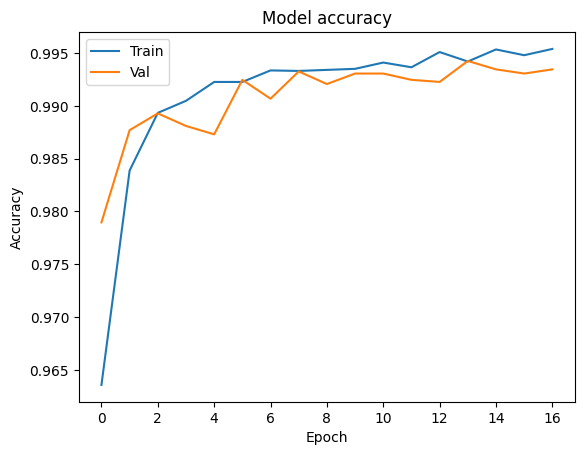

In [232]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

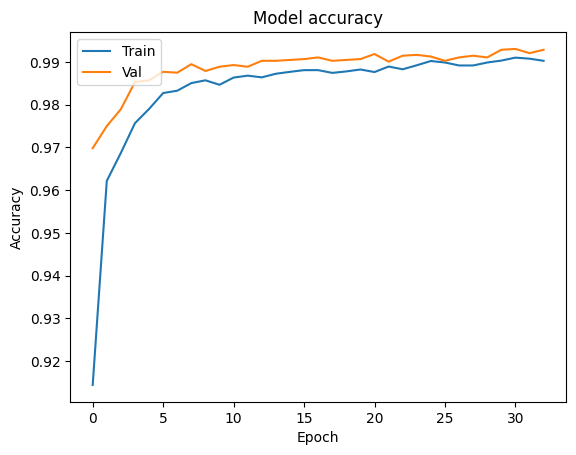

In [233]:
plt.plot(history_d.history['accuracy'])
plt.plot(history_d.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [234]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, classification_report


In [235]:
val_predictions_probs = model.predict(x_val_scaled)

158/158 [==============================] - 0s 2ms/step


In [236]:
val_predictions = (val_predictions_probs > 0.5).astype(int)

In [237]:
print(classification_report(y_val, val_predictions, target_names=['Normal', 'Anomaly']))

              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99      2365
     Anomaly       1.00      0.99      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



In [238]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [239]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, val_predictions)

# Extracting TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

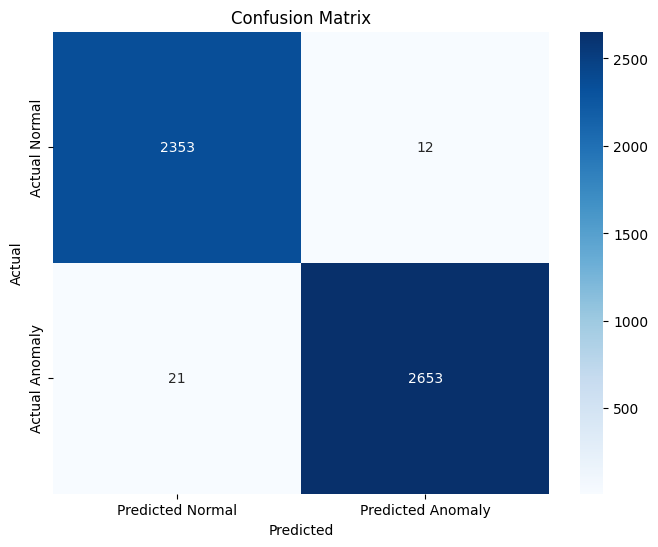

In [240]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Normal', 'Predicted Anomaly'], yticklabels=['Actual Normal', 'Actual Anomaly'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [241]:
val_predictions_probs_d = model_d.predict(x_val_scaled)

158/158 [==============================] - 1s 3ms/step


In [242]:
val_predictions_d = (val_predictions_probs_d > 0.5).astype(int)

In [243]:
print(classification_report(y_val, val_predictions_d, target_names=['Normal', 'Anomaly']))

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99      2365
     Anomaly       0.99      1.00      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



In [244]:
cm_d = confusion_matrix(y_val, val_predictions_d)
tn, fp, fn, tp = cm_d.ravel()

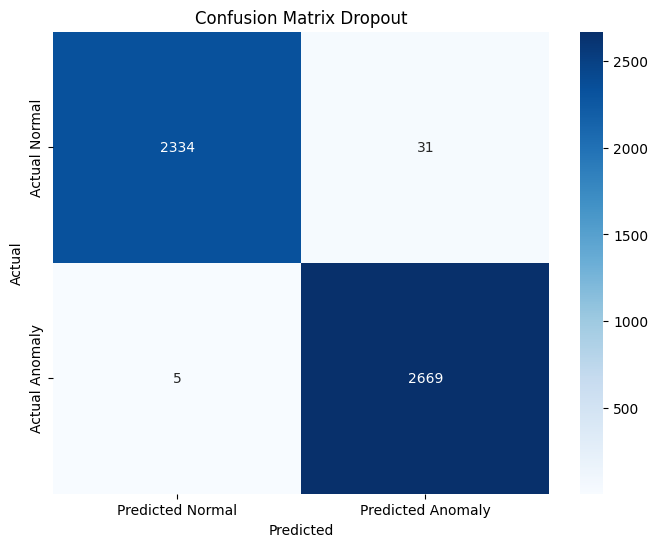

In [245]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_d, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Normal', 'Predicted Anomaly'], yticklabels=['Actual Normal', 'Actual Anomaly'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Dropout')
plt.show()

Our model without dropout has high accuracy of 99.4. We want to lower false negative (actual anomaly but guessed normal) outcomes, because 37 possbile breaches is still terrible. With dropout we hadd 99.1 percent accuracy with only 22 false negatives. We are going to try to change the dropout percent to see if we can find the sweet spot.

2.Fine-Tuning and Adjustments: Based on the results, you might need to adjust the architecture or hyperparameters. Techniques like dropout, regularization, or using a different optimizer can be explored

In [246]:
def make_model_dropout_2():
  d_rate = .4 #lets test .2-.5
  inputs_d   = keras.Input(shape=(x_train_scaled.shape[1]), name= "my_input_d")
  features_d = layers.Dense(128, activation='relu', name='first_layer_d')(inputs_d)
  features_d = layers.Dropout(d_rate)(features_d)
  features_d = layers.Dense(64, activation='relu', name='second_layer_d')(features_d)
  features_d = layers.Dropout(d_rate)(features_d)
  features_d = layers.Dense(32, activation='relu', name='third_layer_d')(features_d)
  features_d = layers.Dropout(d_rate)(features_d)
  outputs_d   = layers.Dense(1,  activation='sigmoid', name='output_layer_d')(features_d)
  model_functional_d2 = keras.Model(inputs=inputs_d, outputs=outputs_d)
  model_functional_d2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model_functional_d2

In [247]:
model_d2 = make_model_dropout_2()
make_model_dropout_2().summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input_d (InputLayer)     [(None, 41)]              0         
                                                                 
 first_layer_d (Dense)       (None, 128)               5376      
                                                                 
 dropout_61 (Dropout)        (None, 128)               0         
                                                                 
 second_layer_d (Dense)      (None, 64)                8256      
                                                                 
 dropout_62 (Dropout)        (None, 64)                0         
                                                                 
 third_layer_d (Dense)       (None, 32)                2080      
                                                                 
 dropout_63 (Dropout)        (None, 32)                0  

In [248]:
early_stopping_d2   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint_d2 = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="model_checkpoint_d2.h5") #model_checkpoint.keras#model_checkpoint.h5
callback_list_d2    = [early_stopping_d2,model_checkpoint_d2]
history_d2 = model_d2.fit(x_train_scaled,y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=64,
          callbacks=callback_list_d2)

Epoch 1/50
315/315 [==============================] - 4s 6ms/step - loss: 0.1920 - accuracy: 0.9335 - val_loss: 0.0709 - val_accuracy: 0.9722
Epoch 2/50
 42/315 [===>..........................] - ETA: 1s - loss: 0.0978 - accuracy: 0.9706

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


315/315 [==============================] - 2s 5ms/step - loss: 0.0915 - accuracy: 0.9699 - val_loss: 0.0486 - val_accuracy: 0.9806
Epoch 3/50
315/315 [==============================] - 2s 7ms/step - loss: 0.0656 - accuracy: 0.9760 - val_loss: 0.0407 - val_accuracy: 0.9855
Epoch 4/50
315/315 [==============================] - 1s 5ms/step - loss: 0.0577 - accuracy: 0.9815 - val_loss: 0.0376 - val_accuracy: 0.9871
Epoch 5/50
315/315 [==============================] - 1s 5ms/step - loss: 0.0484 - accuracy: 0.9830 - val_loss: 0.0322 - val_accuracy: 0.9885
Epoch 6/50
315/315 [==============================] - 2s 5ms/step - loss: 0.0440 - accuracy: 0.9838 - val_loss: 0.0305 - val_accuracy: 0.9881
Epoch 7/50
315/315 [==============================] - 2s 6ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0276 - val_accuracy: 0.9891
Epoch 8/50
315/315 [==============================] - 2s 6ms/step - loss: 0.0371 - accuracy: 0.9872 - val_loss: 0.0320 - val_accuracy: 0.9885
Epoch 9/50
315/31

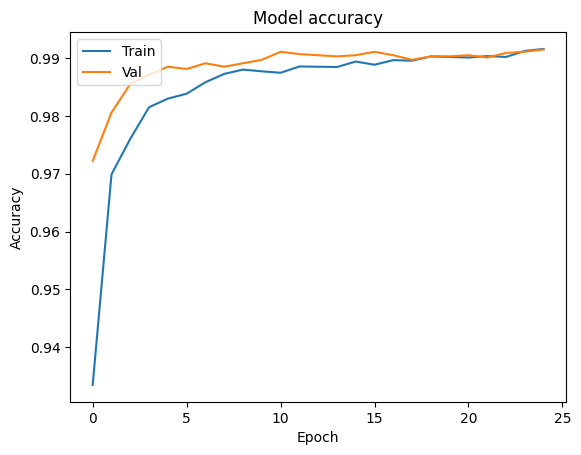

In [249]:
plt.plot(history_d2.history['accuracy'])
plt.plot(history_d2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [250]:
val_predictions_probs_d2 = model_d2.predict(x_val_scaled)

158/158 [==============================] - 0s 2ms/step


In [251]:
val_predictions_d2 = (val_predictions_probs_d2 > 0.5).astype(int)

In [252]:
print(classification_report(y_val, val_predictions_d2, target_names=['Normal', 'Anomaly']))

              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99      2365
     Anomaly       0.99      0.99      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



In [253]:
cm_d2 = confusion_matrix(y_val, val_predictions_d2)
tn, fp, fn, tp = cm_d2.ravel()

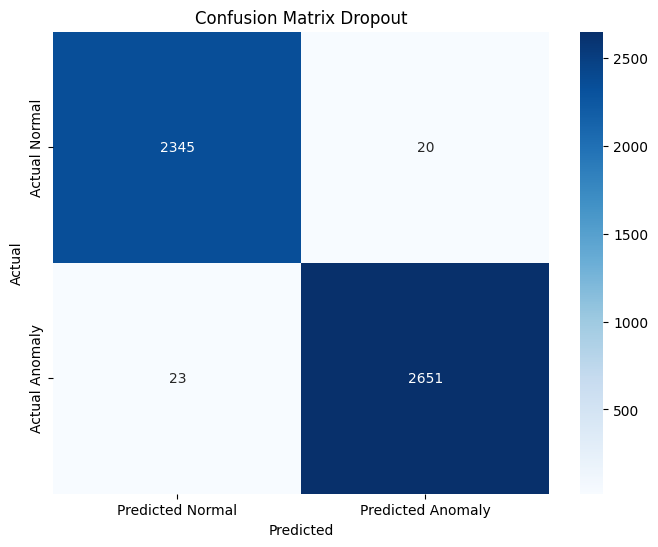

In [254]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_d2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Normal', 'Predicted Anomaly'], yticklabels=['Actual Normal', 'Actual Anomaly'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Dropout')
plt.show()

Changing the dropout rate reduced the incorrectly classified cases generally after rerunning. There is still a chance the false positives do not reduce by much or the false negatives reduce by several cases or increase by a few. The dropout rate that did the best for false negatives was a dropout rate of .4 The graph of accuracies between validation and training sets are super close and overlap at times. There could be some overfitting.

I will alter the sturcture of the dropout.

In [255]:
def make_model_dropout_3():
  d_rate = .5 #lets test .2-.5
  inputs_d   = keras.Input(shape=(x_train_scaled.shape[1]), name= "my_input_d")
  features_d = layers.Dense(256, activation='relu', name='first_layer_d')(inputs_d)
  features_d = layers.Dropout(d_rate)(features_d)
  features_d = layers.Dense(128, activation='relu', name='second_layer_d')(features_d)
  features_d = layers.Dropout(d_rate)(features_d)
  features_d = layers.Dense(64, activation='relu', name='third_layer_d')(features_d)
  features_d = layers.Dropout(d_rate)(features_d)
  features_d = layers.Dense(32, activation='relu', name='fourth_layer_d')(features_d)
  features_d = layers.Dropout(d_rate)(features_d)
  outputs_d   = layers.Dense(1,  activation='sigmoid', name='output_layer_d')(features_d)
  model_functional_d3 = keras.Model(inputs=inputs_d, outputs=outputs_d)
  model_functional_d3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model_functional_d3

In [256]:
model_d3 = make_model_dropout_3()
make_model_dropout_3().summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input_d (InputLayer)     [(None, 41)]              0         
                                                                 
 first_layer_d (Dense)       (None, 256)               10752     
                                                                 
 dropout_68 (Dropout)        (None, 256)               0         
                                                                 
 second_layer_d (Dense)      (None, 128)               32896     
                                                                 
 dropout_69 (Dropout)        (None, 128)               0         
                                                                 
 third_layer_d (Dense)       (None, 64)                8256      
                                                                 
 dropout_70 (Dropout)        (None, 64)                0  

In [257]:
early_stopping_d3   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint_d3 = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="model_checkpoint_d3.h5") #model_checkpoint.keras#model_checkpoint.h5
callback_list_d3    = [early_stopping_d3,model_checkpoint_d3]
history_d3 = model_d3.fit(x_train_scaled,y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=64,
          callbacks=callback_list_d3)

Epoch 1/50
315/315 [==============================] - 3s 6ms/step - loss: 0.2376 - accuracy: 0.9151 - val_loss: 0.0702 - val_accuracy: 0.9754
Epoch 2/50
 36/315 [==>...........................] - ETA: 1s - loss: 0.1108 - accuracy: 0.9661

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


315/315 [==============================] - 2s 5ms/step - loss: 0.0964 - accuracy: 0.9703 - val_loss: 0.0436 - val_accuracy: 0.9837
Epoch 3/50
315/315 [==============================] - 2s 5ms/step - loss: 0.0687 - accuracy: 0.9772 - val_loss: 0.0374 - val_accuracy: 0.9843
Epoch 4/50
315/315 [==============================] - 2s 5ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.0321 - val_accuracy: 0.9873
Epoch 5/50
315/315 [==============================] - 2s 6ms/step - loss: 0.0482 - accuracy: 0.9838 - val_loss: 0.0298 - val_accuracy: 0.9863
Epoch 6/50
315/315 [==============================] - 2s 7ms/step - loss: 0.0475 - accuracy: 0.9839 - val_loss: 0.0291 - val_accuracy: 0.9865
Epoch 7/50
315/315 [==============================] - 2s 6ms/step - loss: 0.0454 - accuracy: 0.9846 - val_loss: 0.0267 - val_accuracy: 0.9891
Epoch 8/50
315/315 [==============================] - 2s 5ms/step - loss: 0.0418 - accuracy: 0.9854 - val_loss: 0.0277 - val_accuracy: 0.9891
Epoch 9/50
315/31

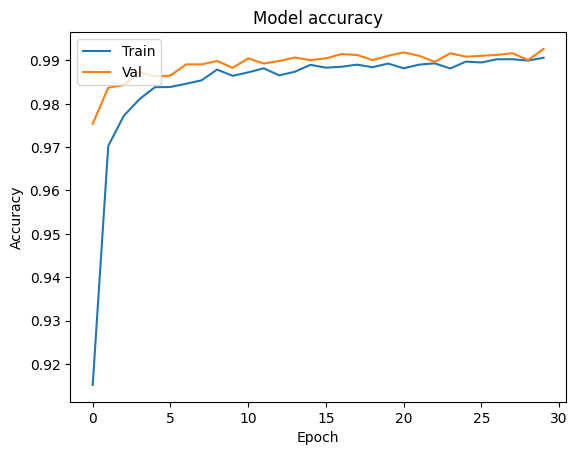

In [258]:
plt.plot(history_d3.history['accuracy'])
plt.plot(history_d3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [259]:
val_predictions_probs_d3 = model_d3.predict(x_val_scaled)

158/158 [==============================] - 0s 2ms/step


In [260]:
val_predictions_d3 = (val_predictions_probs_d3 > 0.5).astype(int)

In [261]:
print(classification_report(y_val, val_predictions_d3, target_names=['Normal', 'Anomaly']))

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99      2365
     Anomaly       0.99      1.00      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



In [262]:
cm_d3 = confusion_matrix(y_val, val_predictions_d3)
tn, fp, fn, tp = cm_d3.ravel()

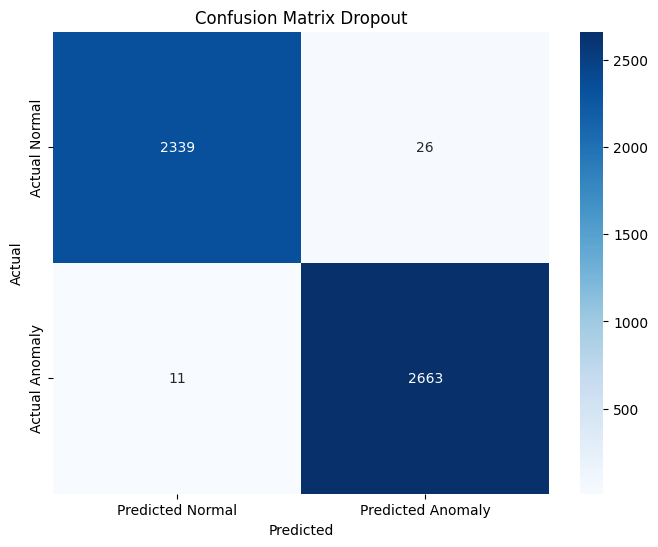

In [263]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_d3, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Normal', 'Predicted Anomaly'], yticklabels=['Actual Normal', 'Actual Anomaly'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Dropout')
plt.show()

3.Error Analysis: Analyze the types of errors your model is making. Understanding where the model fails can provide insights for improvements.

As I have gone through using different dropout values and structures, I have discovered that the origional dropout model of 3 nodes had the most consistent results. The 3rd dropout model was the best with 4 node layers and a dropout rate of .5. I tested solely dropout rates on the 3 node layers and between .4 and .5 on the 4 layer model. The 4 layer model did not have consistent results, so I am not sure if it will get better results over my first dropout model. I tried to test a 5 layer model, but there was more noise in the model. I can also check using different regularization techniques. I could also try restructuring the DNN as an RNN if it is dependent on sequential use. As far as I can tell, I don't beleive it is sequential.I can also change the batch size as well.  There are many things I can continue to try to find the best model. It was also suggested by ChatGPT that I could try and implement the model to favor lowering false negatives too. I would like to get more models before I test on the test set.

In [263]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model

In [ ]:
# #test once you find the best model/more models
#for col in categorical_columns:  # Replace 'categorical_columns' with your list of categorical column names
  #test[col] = le.fit_transform(test[col])
# x_r = test.drop('class', axis=1)
# y_r= test['class']

# # Transform the test data with the same scaler
# x_test_scaled = scaler.transform(x_test)

# # Predict the probabilities on the test set
# test_predictions_probs_best = model.predict(x_test_scaled)

# # Apply the threshold to get the class predictions
# test_predictions_best = (test_predictions_probs_best > 0.5).astype(int)

# # Calculate metrics
# accuracy = accuracy_score(y_test, test_predictions_best)
# precision = precision_score(y_test, test_predictions_best)
# recall = recall_score(y_test, test_predictions_best)
# f1 = f1_score(y_test, test_predictions_best)

# # Generate confusion matrix
# cm_best = confusion_matrix(y_test, test_predictions_best)